In [1]:
import sys
import os
sys.path.append(os.path.abspath("../scripts"))  # Go up one level into scripts/

from data_cleaning import load_data, clean_data, count_invalid_dates

# Load and clean
df = load_data("../Data/TSLA_historical_data.csv")

In [2]:
print("Invalid date count before cleaning:", count_invalid_dates(df))
df = clean_data(df)
print("Data loaded and cleaned. Shape:", df.shape)
df.head()

Invalid date count before cleaning: 0
Data loaded and cleaned. Shape: (3545, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [3]:
from indicators import add_technical_indicators
df = add_technical_indicators(df)
# Preview
df[['Date', 'Close', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail(10)

,Date,Close,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist
3535,2024-07-17,248.500000,223.778000,65.715141,19.134324,17.754460,1.379865
3536,2024-07-18,249.229996,226.996500,66.005487,18.309263,17.865420,0.443843
3537,2024-07-19,239.199997,229.877999,58.655486,16.654081,17.623152,-0.969071
3538,2024-07-22,251.509995,233.302999,63.959876,16.149490,17.328420,-1.178930
3539,2024-07-23,246.380005,236.492999,60.477660,15.160886,16.894913,-1.734027
3540,2024-07-24,215.990005,237.924999,44.886918,11.789291,15.873789,-4.084498
3541,2024-07-25,220.250000,239.118999,46.951389,9.353206,14.569672,-5.216466
3542,2024-07-26,219.800003,240.238000,46.752165,7.302106,13.116159,-5.814053
3543,2024-07-29,232.100006,241.949000,52.664511,6.593101,11.811547,-5.218447
3544,2024-07-30,222.619995,242.587000,48.220474,5.206237,10.490485,-5.284248


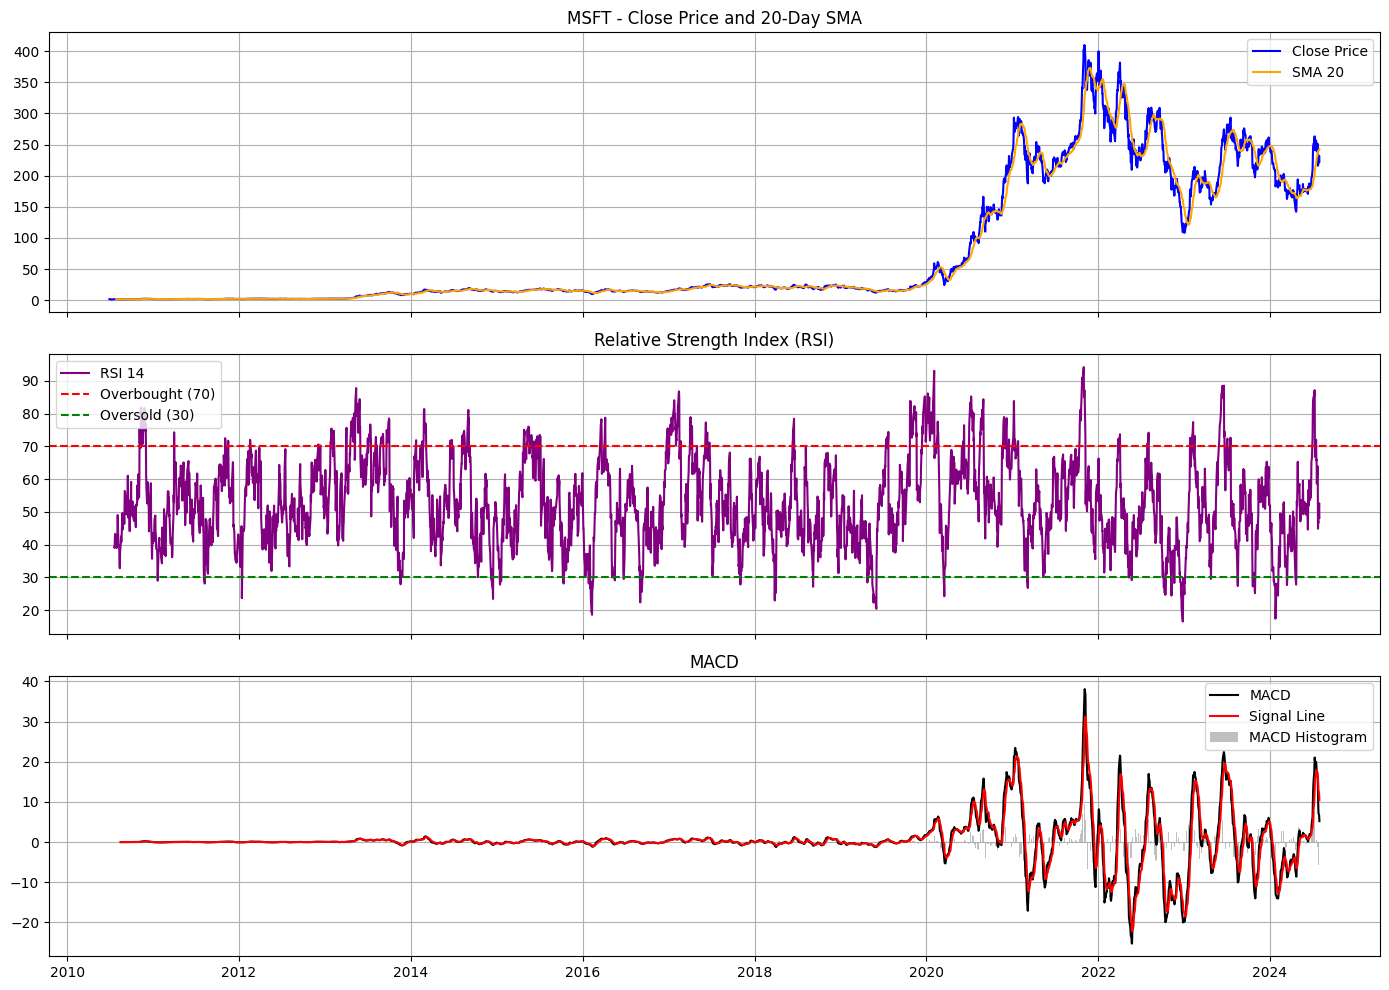

In [4]:
from visuals import plot_indicators
plot_indicators(df, ticker_name="MSFT")

📊 TSLA Technical Indicator Summary (Last 10 Days)
Column	Description
Date	Trading date for each record.
Close	Closing price of TSLA.
SMA_20	20-day Simple Moving Average — used to observe trend direction.
RSI_14	14-day Relative Strength Index — measures momentum:
🔺 RSI > 70 → Overbought
🔻 RSI < 30 → Oversold
MACD	Moving Average Convergence Divergence — measures momentum shift.
MACD_Signal	9-day EMA of MACD — used as a trigger line for signals.
MACD_Hist	MACD minus Signal — indicates bullish or bearish momentum.

🔍 Interpretation
RSI:
RSI started high (65.71) on 2024-07-17, suggesting strong momentum, but dropped to 48.22 by 2024-07-30.

The RSI is now in a neutral zone — below overbought (70) and above oversold (30).

Momentum is slowing down, but not yet oversold.

MACD & Histogram:
MACD fell from 19.13 to 5.20, and the histogram went from +1.38 to -5.28.

The MACD Histogram turned negative on 2024-07-19, indicating bearish divergence.

MACD is well below the Signal line now — a strong bearish signal.

SMA vs Close:
The Close price dropped below the 20-day SMA:

On 2024-07-30: Close = 222.62, SMA_20 = 242.59

This suggests the price is underperforming its average — a downtrend confirmation.

✅ Key Takeaways:
📉 Momentum is weakening:

RSI is drifting downward

MACD histogram is deeply negative

📊 Close < SMA_20 confirms a short-term downtrend.

⚠️ Currently no buy signal:

Wait for MACD crossover upward, or

RSI to rebound toward 60–70.